In [2]:
import pandas as pd

def analizar_distribuciones_eventos_real(csv_path: str = r"C:\Users\evaru\OneDrive\Escritorio\sismiaio\data\clean\dataset_modelo.csv") -> dict:
    """
    Analiza la distribución real de eventos de pago en Girona.
    Devuelve los diccionarios con pesos para DIA_SEMANA_NUM y SEMANA_MES.
    """
    # === Cargar datos
    df = pd.read_csv(csv_path)

    # === Normalización básica
    df["COMUNIDAD"] = df["COMUNIDAD"].str.strip().str.upper()
    df["TIPO_EVENTO"] = df["TIPO_EVENTO"].str.strip().str.lower()

    # === Filtrar solo eventos REALES, DE PAGO, en GIRONA
    df_reales = df[
        (df["COMUNIDAD"] == "GIRONA") &
        (df["TIPO_EVENTO"] == "pago")
     ].copy()

    if df_reales.empty:
        print("⚠️ No se encontraron eventos reales de pago en Girona.")
        return {}

    # === Distribuciones
    dias_semana = df_reales["DIA_SEMANA_NUM"].value_counts(normalize=True).sort_index()
    semanas_mes = df_reales["SEMANA_DENTRO_DEL_MES"].dropna().astype(int).value_counts(normalize=True).sort_index()

    pesos_dia_semana = dias_semana.to_dict()
    pesos_semana_mes = semanas_mes.to_dict()

    print("📅 Distribución real de DIA_SEMANA_NUM (%):\n", dias_semana)
    print("\n📅 Distribución real de semana dentro del mes (%):\n", semanas_mes)
    print("\n🎯 Diccionario para simulación - DIA_SEMANA_NUM:\n", pesos_dia_semana)
    print("\n🎯 Diccionario para simulación - SEMANA_MES:\n", pesos_semana_mes)

    return {
        "pesos_dia_semana": pesos_dia_semana,
        "pesos_semana_mes": pesos_semana_mes
    }

# === EJECUCIÓN DIRECTA DEL SCRIPT
if __name__ == "__main__":
    pesos = analizar_distribuciones_eventos_real()

📅 Distribución real de DIA_SEMANA_NUM (%):
 DIA_SEMANA_NUM
4    0.166667
6    0.833333
Name: proportion, dtype: float64

📅 Distribución real de semana dentro del mes (%):
 SEMANA_DENTRO_DEL_MES
1    0.166667
2    0.500000
3    0.333333
Name: proportion, dtype: float64

🎯 Diccionario para simulación - DIA_SEMANA_NUM:
 {4: 0.16666666666666666, 6: 0.8333333333333334}

🎯 Diccionario para simulación - SEMANA_MES:
 {1: 0.16666666666666666, 2: 0.5, 3: 0.3333333333333333}


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribuciones_eventos(pesos_dia_semana: dict, pesos_semana_mes: dict):
    # === Día de la semana
    plt.figure(figsize=(6, 4))
    dias_labels = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
    dias_indices = list(pesos_dia_semana.keys())
    valores_dias = list(pesos_dia_semana.values())
    etiquetas_dias = [dias_labels[i] for i in dias_indices]

    sns.barplot(x=etiquetas_dias, y=valores_dias)
    plt.title("Distribución real - Día de la semana")
    plt.ylabel("Proporción")
    plt.xlabel("Día")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # === Semana del mes
    plt.figure(figsize=(8, 4))
    semanas = list(pesos_semana_mes.keys())
    valores_semanas = list(pesos_semana_mes.values())

    sns.barplot(x=semanas, y=valores_semanas)
    plt.title("Distribución real - Semana del mes")
    plt.ylabel("Proporción")
    plt.xlabel("Número de semana del mes")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

📅 Distribución real de DIA_SEMANA_NUM (%):
 DIA_SEMANA_NUM
4    0.166667
6    0.833333
Name: proportion, dtype: float64

📅 Distribución real de semana dentro del mes (%):
 SEMANA_DENTRO_DEL_MES
1    0.166667
2    0.500000
3    0.333333
Name: proportion, dtype: float64

🎯 Diccionario para simulación - DIA_SEMANA_NUM:
 {4: 0.16666666666666666, 6: 0.8333333333333334}

🎯 Diccionario para simulación - SEMANA_MES:
 {1: 0.16666666666666666, 2: 0.5, 3: 0.3333333333333333}


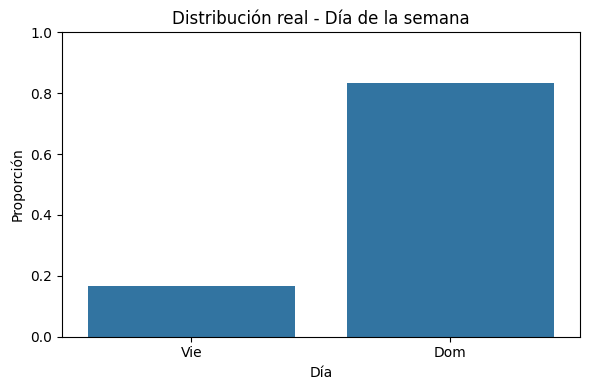

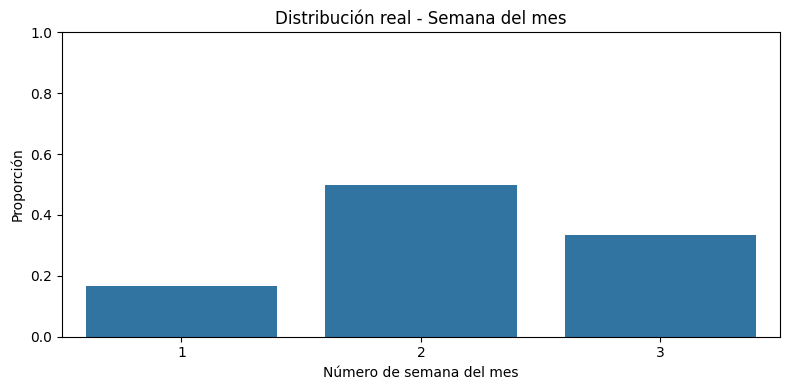

In [4]:
pesos = analizar_distribuciones_eventos_real()
plot_distribuciones_eventos(pesos["pesos_dia_semana"], pesos["pesos_semana_mes"])
